<img src="./img/logo.png" align="right" width="50%"></img>
# iAtlantic GeoNode 101
### Tier 2: How to use OGC webservices offered by the iAtlantic GeoNode in your data analysis

## 2. Visualize data using OGC Web Mapping Service (WMS)

#### OWSlib library - Using WMS from Python

In [1]:
# load owslib library
from owslib.wms import WebMapService

#### Create a WebMapService object

In [2]:
# Create your WebMapService object
wms = WebMapService('http://www.geonode.iatlantic.eu/geoserver/ows', version='1.3.0')

#### Find out what a WMS has to offer. Service metadata:

In [3]:
print(wms.identification.type)
print(wms.identification.version)
print(wms.identification.title)
print(wms.identification.abstract)

WMS
1.3.0
iAtlantic WMS
This WMS service offers visualization of data collected within the framework of the iAtlantic project.


#### Find out what layers are available

In [4]:
list(wms.contents)

['geonode:AWI',
 'geonode:DCDB_200320_BathyCoverage_iAtlantic',
 'geonode:DynamicSurface_Exp_300m_IP_MSM88_2_UTM26N',
 'geonode:iAtlantic_Research_Areas_merged']

#### Get the details of a layer. Layer metadata:

In [5]:
print(wms['geonode:iAtlantic_Research_Areas_merged'].title)
print(wms['geonode:iAtlantic_Research_Areas_merged'].abstract)

iAtlantic Research Areas
iAtlantic targets 12 large marine regions in the deep sea and open-ocean, chosen because they are: directly impacted by major circulation pathways, in proximity to ocean arrays for monitoring, of international conservation significance (e.g., to the CBD EBSA process) and of interest to Blue Economy and Blue Growth sectors. iAtlantic will assess ecosystem status and work directly with these sectors to provide the data and tools needed for sustainable management. These regions and ecosystems span the Arctic to Southern Ocean: (1) subpolar Mid-Atlantic Ridge open-ocean ecosystem off Iceland; (2) abyssal plain and deep-sea coral banks from the Rockall Trough to the Porcupine Abyssal Plain (PAP); (3) deep-sea coral and hydrothermal vent ecosystems of the central Mid-Atlantic Ridge; (4) deep-sea canyons and open-ocean ecosystem in the northwest Atlantic; (5) subtropical open-ocean ecosystem of the Sargasso Sea; (6) the tropical open-ocean off equatorial Africa; (7) e

#### Get bounding box information in WGS84

In [6]:
wms['geonode:iAtlantic_Research_Areas_merged'].boundingBoxWGS84

(-76.3085784912109, -53.9998397827148, 17.4152240753174, 69.4836349487305)

#### Get available styles

In [7]:
wms['geonode:iAtlantic_Research_Areas_merged'].styles

{'geonode:iAtlantic_Research_Areas_merged': {'title': 'geonode:iAtlantic_Research_Areas_merged',
  'legend': 'http://www.geonode.iatlantic.eu/geoserver/ows?service=WMS&request=GetLegendGraphic&format=image%2Fpng&width=20&height=20&layer=geonode%3AiAtlantic_Research_Areas_merged',
  'legend_width': '20',
  'legend_height': '20',
  'legend_format': 'image/png'}}

#### See available methods

In [8]:
[op.name for op in wms.operations]

['GetCapabilities', 'GetMap', 'GetFeatureInfo']

#### Get available formats

In [9]:
wms.getOperationByName('GetMap').formatOptions

['image/png',
 'application/atom+xml',
 'application/json;type=utfgrid',
 'application/pdf',
 'application/rss+xml',
 'application/vnd.google-earth.kml+xml',
 'application/vnd.google-earth.kml+xml;mode=networklink',
 'application/vnd.google-earth.kmz',
 'image/geotiff',
 'image/geotiff8',
 'image/gif',
 'image/jpeg',
 'image/png; mode=8bit',
 'image/svg+xml',
 'image/tiff',
 'image/tiff8',
 'image/vnd.jpeg-png',
 'image/vnd.jpeg-png8',
 'text/html; subtype=openlayers',
 'text/html; subtype=openlayers2',
 'text/html; subtype=openlayers3']

#### Get georeferenced map images and plot with basemap

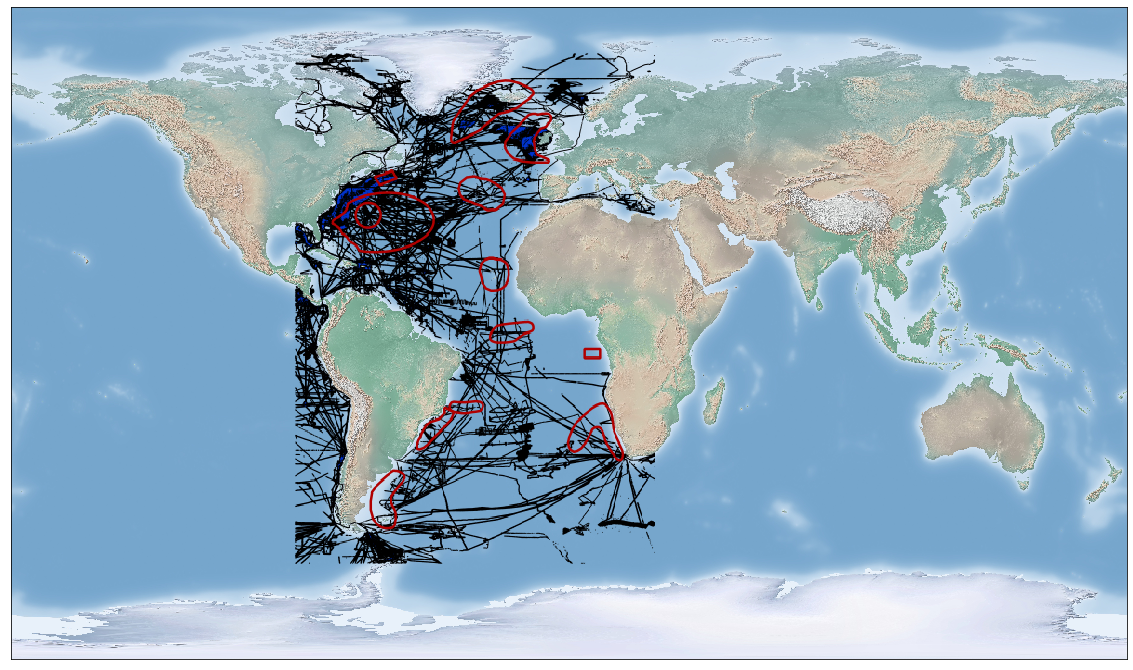

In [10]:
%matplotlib inline
import os, sys
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

def getMap(layerName,bbox,filename):
    wms.getOperationByName('GetMap').formatOptions
    img = wms.getmap(layers=[layerName],
                 size=(1200,600),
                 srs='EPSG:4326',
                 bbox=bbox,
                 format='image/png',
                 transparent=True)

    tmpfile = open(filename,'wb')
    tmpfile.write(img.read())
    tmpfile.close()

getMap('geonode:DCDB_200320_BathyCoverage_iAtlantic',(-180,-90,180,90), 'img/bathymetry.png')
getMap('geonode:iAtlantic_Research_Areas_merged',(-180,-90,180,90), 'img/research_areas.png')

image1=mpimg.imread('img/bathymetry.png')
image2=mpimg.imread('img/research_areas.png')

plt.figure(figsize=(20, 12))
map = Basemap()
map.shadedrelief() #get a nice background map
plt.imshow(image1,extent=[-180,180,-90,90],aspect='auto')
plt.imshow(image2,extent=[-180,180,-90,90],aspect='auto')

plt.show()

#### Use the WMS service directly in Cartopy

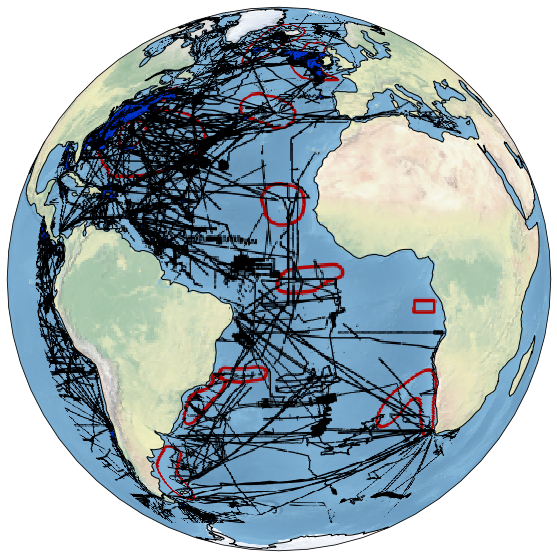

In [53]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(central_longitude=-25, central_latitude=0)) #set custom projection
ax.coastlines() #draw coastlines
ax.stock_img() #draw nice background
ax.add_wms(wms='http://www.geonode.iatlantic.eu/geoserver/ows',
           layers=['geonode:iAtlantic_Research_Areas_merged',
                   'geonode:DCDB_200320_BathyCoverage_iAtlantic']) #access WMS
plt.show()